In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings; warnings.filterwarnings(action='ignore')
# --------------------------------------------------

# --------------------------------------------------
# load datasets
from sklearn import datasets

# imblearn.sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# preprocessing.encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # pd.get_dummies()
# preprocessing.scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# preprocessing.binarizing
from sklearn.preprocessing import Binarizer

# model_selection.splitter
from sklearn.model_selection import train_test_split       # function
# model_selection.model_validation
from sklearn.model_selection import KFold, StratifiedKFold # cross-validator
from sklearn.model_selection import cross_val_score
# model_selection.hyper_parameter_optimizer
from sklearn.model_selection import GridSearchCV

# models/estimators
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# models : boost
import xgboost as xgb
import lightgbm

# metrics.scores
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
# metrics.curves
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import roc_curve, plot_roc_curve
# metrics.reports
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
# --------------------------------------------------

# **************************************************

# --------------------------------------------------
def check_nan(df):
    nan = df.isna().sum()[df.isna().sum() != 0]
    nan_cols = list(nan.index)
    nan_cnt  = df[nan_cols].isna().sum()
    rate = round(nan_cnt / df.shape[0] * 100, 2)
    nan_df = pd.DataFrame({'NAN_CNT':nan_cnt, 'RATE':rate})
    
    print(nan_df)
    print('-' * 30)
    print('nan_cols count =', len(nan_cols))
    print(nan_cols)

    for col in nan_cols:
        print('-' * 30)
        print(df[col].value_counts())
        print('value_counts =', df[col].count(), '/ nan_counts =', df[col].isna().sum())
    
    return nan_cols
# nan_cols = check_nan(df)
# --------------------------------------------------

# --------------------------------------------------
def encode(df):
    object_cols = list(df.dtypes[df.dtypes == 'object'].index)
    print('object_cols count =', len(object_cols))
    for col in object_cols:
        print('-' * 30)
        print(df[col].value_counts())
    return object_cols
# object_cols = encode(df)
# --------------------------------------------------

# --------------------------------------------------
def mapping(df, col):
    dict = {}
    
    for i in range(len(df[col].value_counts().index)):
        dict[df[col].value_counts().index[i]] = i
    
    df[col] = df[col].map(dict)
    return df[col].value_counts()
# mapping(df, 'gender')
# --------------------------------------------------

# --------------------------------------------------
def split_xy(df, target):
    X = df.drop(target, axis=1)
    y = df[target]
    return X, y
# X, y = split_xy(df, 'target')
# --------------------------------------------------

# --------------------------------------------------
def scores(y_test, y_pred):
    
    """evaluation scores"""
    
    f1        = f1_score         (y_test, y_pred)
    accuracy  = accuracy_score   (y_test, y_pred)
    precision = precision_score  (y_test, y_pred)
    recall    = recall_score     (y_test, y_pred)
    c_matrix  = confusion_matrix (y_test, y_pred)
    
    print('-' * 45)
    print(
          f'accuracy  = {accuracy:.6f},  '
          f'f1 score  = {f1:.6f},  \n'
          f'precision = {precision:.6f},  '
          f'recall    = {recall:.6f},')
    
    print(c_matrix)
# --------------------------------------------------

# --------------------------------------------------
def curves(y_test, probas_pred):
        
    FPRS, TPRS, thresholds = roc_curve(y_test, probas_pred[:, 1])

    f, ax = plt.subplots(1, 2, figsize=(16, 6))

    # settings
    plt.subplot(121)
    plt.title('ROC curve')
    plt.gray()
    plt.xlabel('FPR(1- specificity)')
    plt.ylabel('TPR')

    # x, y values
    plt.plot(FPRS, TPRS, label='ROC', linestyle='solid')
    plt.plot([0, 1], [0, 1], label='50%', color='gray', linestyle=':')
    plt.legend()

    precisions, recalls, thresholds = precision_recall_curve(y_test, probas_pred[:, 1])
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

    plt.subplot(122)
    plt.title('precision recall curve')
    plt.gray()
    plt.xlabel('threshold')
    plt.ylabel('scores')

    # x, y values
    plt.plot(thresholds, precisions[:thresholds.shape[0]], label='precision', linestyle=':')
    plt.plot(thresholds, recalls[:thresholds.shape[0]],    label='recall',    linestyle='--')
    plt.plot(thresholds, f1_scores[:thresholds.shape[0]],  label='f1',        linestyle='solid')
    # valid linestyle = '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
    plt.legend()

    plt.show()

    print('AUC = ', roc_auc_score(y_test, probas_pred[:, 1]))
# --------------------------------------------------
# --------------------------------------------------


# credit_card_fraud sample

In [2]:
df = pd.read_csv('./kaggle/credit_card_fraud/creditcard_sample.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56962 entries, 0 to 56961
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    56962 non-null  float64
 1   V1      56962 non-null  float64
 2   V2      56962 non-null  float64
 3   V3      56962 non-null  float64
 4   V4      56962 non-null  float64
 5   V5      56962 non-null  float64
 6   V6      56962 non-null  float64
 7   V7      56962 non-null  float64
 8   V8      56962 non-null  float64
 9   V9      56962 non-null  float64
 10  V10     56962 non-null  float64
 11  V11     56962 non-null  float64
 12  V12     56962 non-null  float64
 13  V13     56962 non-null  float64
 14  V14     56962 non-null  float64
 15  V15     56962 non-null  float64
 16  V16     56962 non-null  float64
 17  V17     56962 non-null  float64
 18  V18     56962 non-null  float64
 19  V19     56962 non-null  float64
 20  V20     56962 non-null  float64
 21  V21     56962 non-null  float64
 22

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# 시계열은 split하여 학습할 때 특별한 조작 필요
df.drop('Time', axis=1, inplace=True)
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [5]:
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((56962, 29), (56962,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45569, 29), (11393, 29), (45569,), (11393,))

In [7]:
# scale ; Amount

scalers = [MinMaxScaler(), StandardScaler(), RobustScaler()]

# input arr shape(-1, 1)
reshape_X_train = X_train['Amount'].values.reshape(-1, 1)
reshape_X_test = X_test['Amount'].values.reshape(-1, 1)
print(reshape_X_train.shape, reshape_X_test.shape)

(45569, 1) (11393, 1)


In [8]:
for sc in scalers:
    
    # scale.fit X_train
    sc.fit(reshape_X_train)
    
    # scale.transform X_train, X_test
    sc_X_train = sc.transform(reshape_X_train)
    sc_X_test  = sc.transform(reshape_X_test )
    
    # scaled col ; reshape to concat
    X_train['Amount' + sc.__class__.__name__[:3]] = sc_X_train.reshape(-1, 1)
    X_test ['Amount' + sc.__class__.__name__[:3]] = sc_X_test .reshape(-1, 1)

In [9]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,AmountMin,AmountSta,AmountRob
42345,-2.838559,-0.039808,1.248880,0.022622,-0.562450,1.558225,-0.693506,1.728842,-0.361553,-0.671659,...,0.348250,-0.830101,-0.104357,0.454705,0.374324,-0.281104,105.10,0.008140,0.041796,0.990483
32426,-0.957720,-0.744650,0.847859,-1.349291,-0.027012,-1.269145,0.941633,-0.620563,-0.433626,1.012404,...,0.158579,0.405024,-0.574302,0.788743,0.093828,-0.031024,138.00,0.010689,0.170127,1.402454
48645,-0.246418,1.507680,1.367568,2.517219,-0.345926,0.429856,-0.576798,-2.331898,-1.358382,0.959398,...,0.275977,0.468193,0.483079,-0.094455,0.238044,0.237868,8.99,0.000696,-0.333096,-0.212998
24121,-0.898567,1.296301,0.887681,0.329085,0.912182,-1.323694,1.048802,-0.227076,-0.684641,-1.261214,...,-0.214606,0.254817,0.350808,-0.480854,-0.025142,0.158007,1.00,0.000077,-0.364262,-0.313048
34624,-1.500784,-1.990378,2.414017,-2.319367,-1.528177,-0.107953,-0.336979,0.453382,2.907128,-2.618142,...,0.346152,0.571720,0.602116,-0.690611,0.025956,0.050733,259.46,0.020096,0.643900,2.923366


In [10]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,AmountMin,AmountSta,AmountRob
18912,-1.101839,0.478693,1.800158,-0.617546,-0.082720,-0.712336,1.488370,-0.257779,-0.579438,-0.394785,...,0.173148,0.449468,-0.017847,-0.166866,-0.298316,-0.190384,124.90,0.009674,0.119029,1.238417
29518,1.023016,-0.398145,0.472963,0.703645,-0.070991,1.397537,-0.645396,0.639397,0.975200,-0.343152,...,0.080854,-0.975053,0.154412,0.547478,0.041354,-0.006717,12.31,0.000953,-0.320145,-0.171425
19786,1.171674,0.227320,0.289589,0.530368,-0.162264,-0.286743,-0.123704,0.106217,-0.166848,-0.145187,...,0.151814,-0.033823,0.099602,0.108333,-0.013014,0.016160,0.99,0.000077,-0.364301,-0.313173
14472,1.183329,-0.218238,0.651000,-0.167509,-0.769834,-0.379657,-0.481943,0.188163,0.333206,-0.046214,...,0.157170,0.247856,-0.060263,0.908854,-0.066963,-0.005254,1.46,0.000113,-0.362467,-0.307288
28135,-0.713810,1.157668,0.776284,0.800797,-0.721380,0.354157,1.796804,-0.278095,-0.552579,-0.031601,...,-0.057803,0.112595,-0.247214,-0.306119,0.319849,0.137841,237.50,0.018395,0.558242,2.648385


In [11]:
# shuffle=True -> X/y 동일하게 처리
scaled_X = pd.concat([X_train, X_test])
scaled_y = pd.concat([y_train, y_test])
scaled_X.shape, scaled_y.shape

((56962, 32), (56962,))

In [12]:
X1 = scaled_X.drop(['Amount', 'AmountSta', 'AmountMin'], axis=1)
X2 = scaled_X.drop(['Amount', 'AmountMin', 'AmountRob'], axis=1)
X3 = scaled_X.drop(['Amount', 'AmountSta', 'AmountRob'], axis=1)

---------------------------------------------
accuracy  = 0.999561,  f1 score  = 0.857143,  
precision = 1.000000,  recall    = 0.750000,
[[11373     0]
 [    5    15]]


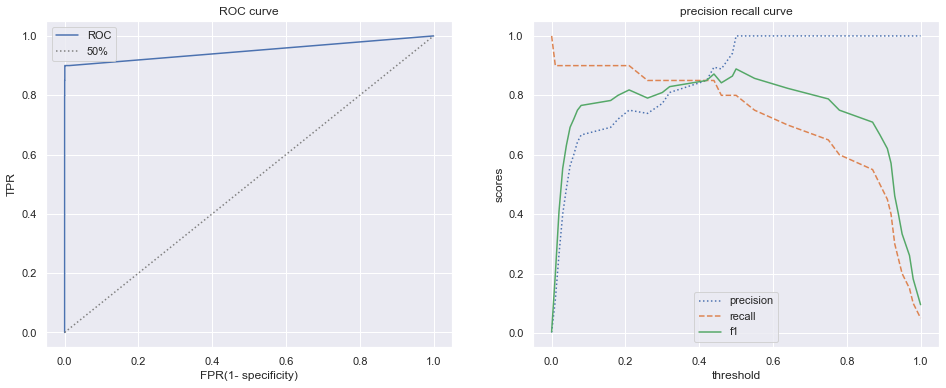

AUC =  0.9493273542600897
---------------------------------------------
accuracy  = 0.999561,  f1 score  = 0.857143,  
precision = 1.000000,  recall    = 0.750000,
[[11373     0]
 [    5    15]]


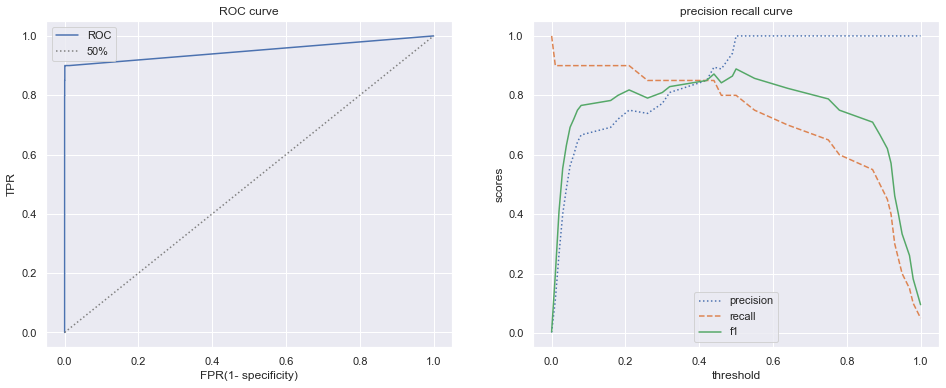

AUC =  0.9493273542600897
---------------------------------------------
accuracy  = 0.999561,  f1 score  = 0.857143,  
precision = 1.000000,  recall    = 0.750000,
[[11373     0]
 [    5    15]]


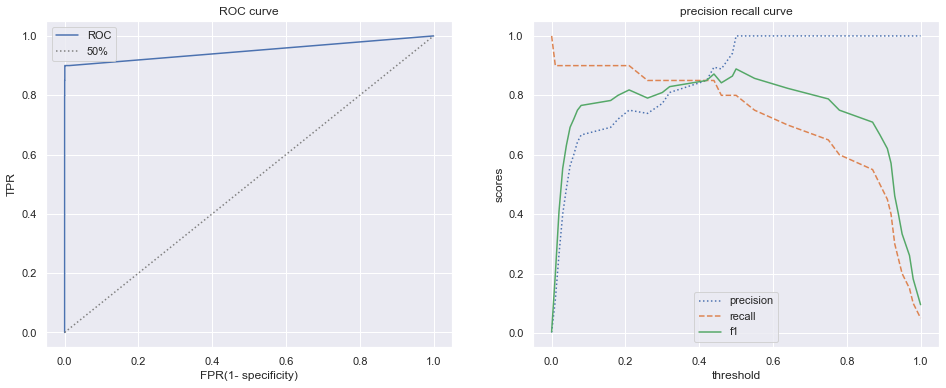

AUC =  0.9493273542600897


In [13]:
# scores
Xs = [X1, X2, X3]

for x in Xs:
    model = RandomForestClassifier(random_state=0)
    sX_train, sX_test, sy_train, sy_test = train_test_split(x, scaled_y, test_size=0.2, random_state=0, stratify=scaled_y)

    model.fit(sX_train, sy_train)
    sy_pred = model.predict(sX_test)
    sprobas_pred = model.predict_proba(sX_test)
    
    scores(sy_test, sy_pred)
    curves(sy_test, sprobas_pred)

# sampling

In [14]:
# N/P 데이터 불균형 때문에, 인위적으로 데이터의 양을 조작
# KNN의 원리를 이용하여 가까운 특성을 지닌 것들로 데이터의 양을 유사하게 늘림
# !pip install imblearn

# N/P의 크기를 over는 큰 쪽, under는 작은 쪽으로 맞춤
# 학습의 질을 향상시키기 위한 것이기 때문에, train_set만 fit_resample

## oversampling SMOTE

before oversampling = (45569, 32) (45569,)
after oversampling = (90980, 32) (90980,)
---------------------------------------------
accuracy  = 0.999737,  f1 score  = 0.926829,  
precision = 0.904762,  recall    = 0.950000,
[[11371     2]
 [    1    19]]


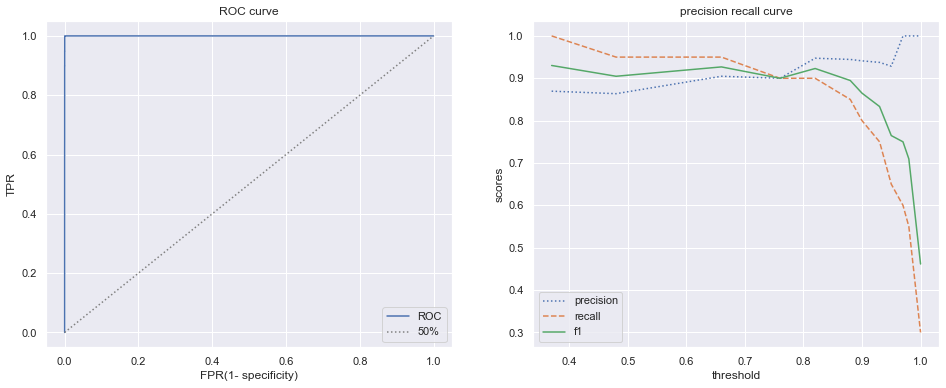

AUC =  0.9999538380374571


In [19]:
# # 일반적으로 sampling 후 scale
# # N/P 중 비율

smote = SMOTE(random_state=0)

print('before oversampling =', X_train.shape, y_train.shape)

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('after oversampling =', X_train_over.shape, y_train_over.shape)

model = RandomForestClassifier(random_state=0)
model.fit(X_train_over, y_train_over)
y_pred = model.predict(X_test)
probas_pred = model.predict_proba(X_test)

scores(y_test, y_pred)
curves(y_test, probas_pred)

---------------------------------------------
accuracy  = 0.999649,  f1 score  = 0.894737,  
precision = 0.944444,  recall    = 0.850000,
[[11372     1]
 [    3    17]]


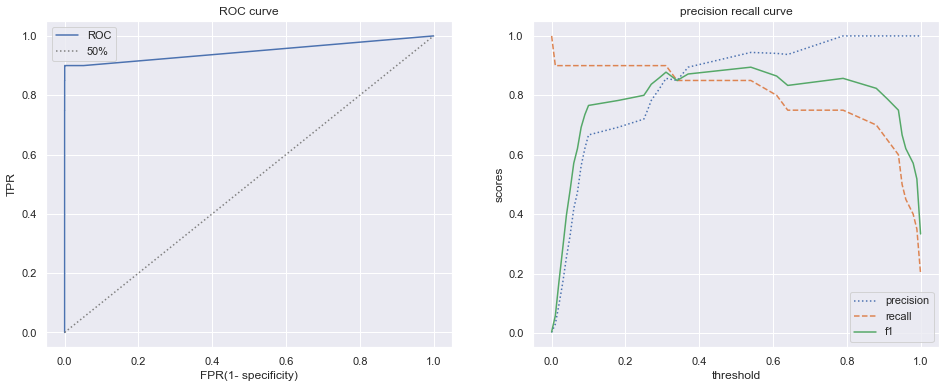

AUC =  0.9474061373428294


In [20]:
# score after StandartdScale (X2)
X2_train, X2_test, y_train, y_test = train_test_split(X2, scaled_y, test_size=0.2, random_state=0, stratify=scaled_y)

X2_train_over, y_train_over = smote.fit_resample(X2_train, y_train)

model = RandomForestClassifier(random_state=0)
model.fit(X2_train_over, y_train_over)
y_pred = model.predict(X2_test)
probas_pred = model.predict_proba(X2_test)

scores(y_test, y_pred)
curves(y_test, probas_pred)

## undersampling : NearMiss

---------------------------------------------
accuracy  = 0.738173,  f1 score  = 0.013232,  
precision = 0.006660,  recall    = 1.000000,
[[8390 2983]
 [   0   20]]


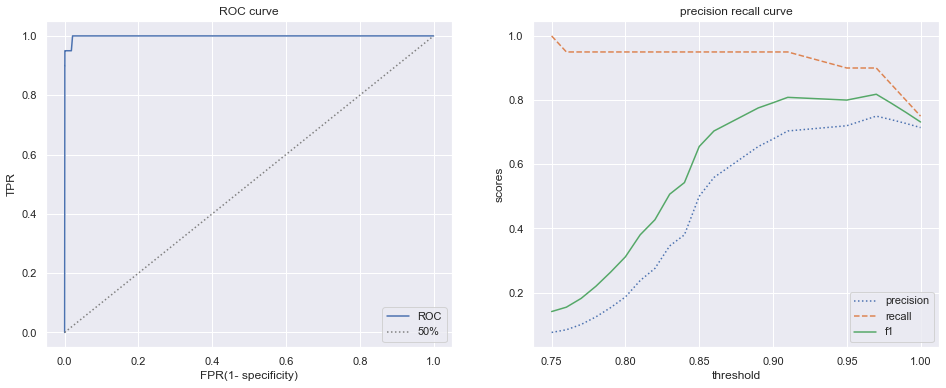

AUC =  0.9986986722940296


In [22]:
# score before sc

nm = NearMiss()
X_train_under, y_train_under = nm.fit_resample(X_train, y_train)

model = RandomForestClassifier(random_state=0)
model.fit(X_train_under, y_train_under)
y_pred = model.predict(X_test)
probas_pred = model.predict_proba(X_test)

scores(y_test, y_pred)
curves(y_test, probas_pred)

---------------------------------------------
accuracy  = 0.691214,  f1 score  = 0.010686,  
precision = 0.005373,  recall    = 0.950000,
[[7856 3517]
 [   1   19]]


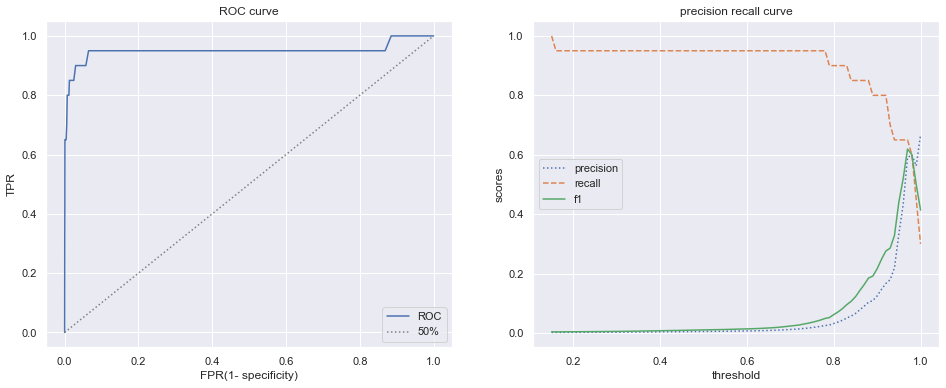

AUC =  0.9500043963773849


In [23]:
# score after sc
nm = NearMiss()
X2_train_under, y_train_under = nm.fit_resample(X2_train, y_train)

model = RandomForestClassifier(random_state=0)
model.fit(X2_train_under, y_train_under)
y_pred = model.predict(X2_test)
probas_pred = model.predict_proba(X2_test)

scores(y_test, y_pred)
curves(y_test, probas_pred)

# outlier

In [24]:
# median : 중앙값, 값을 중복을 제거하여 순서대로 나열했을 때 중앙에 있는 값
# quarter : 중앙값을 기준으로 4등분

# casting

In [25]:
# list to srs
list = [1, 2, 3, 3, 4, 4]
pd.Series(list)

0    1
1    2
2    3
3    3
4    4
5    4
dtype: int64

In [26]:
# list to arr ; array는 메서드를 거쳐서만 구성 가능, python 내부적으로만 존재
np.array(list)

array([1, 2, 3, 3, 4, 4])

In [27]:
# arr to series
arr = np.array(list)
pd.Series(arr)

0    1
1    2
2    3
3    3
4    4
5    4
dtype: int32

In [30]:
# dict
list = [1, 2, 3, 3, 4, 4, 1]
val2 = [1, 2, 3, 3, 4, 4, 0]
dict = {'val':list, 'val2':val2}

print(dict.items()), print(dict.values()), print(dict.keys())

dict_items([('val', [1, 2, 3, 3, 4, 4, 1]), ('val2', [1, 2, 3, 3, 4, 4, 0])])
dict_values([[1, 2, 3, 3, 4, 4, 1], [1, 2, 3, 3, 4, 4, 0]])
dict_keys(['val', 'val2'])


(None, None, None)

In [32]:
# dict to df
pd.DataFrame(dict)

,val,val2
0,1,1
1,2,2
2,3,3
3,3,3
4,4,4
5,4,4
6,1,0


In [35]:
# list to df ; col (axis=1)
pd.DataFrame(list)

,0
0,1
1,2
2,3
3,3
4,4
5,4
6,1


In [34]:
# list to df ; row (axis=0)
pd.DataFrame([list])

,0,1,2,3,4,5,6
0,1,2,3,3,4,4,1


In [38]:
# lists to df
list1 = [1, 2, 3]
list2 = [10, 20, 30]
pd.DataFrame([list1, list2], index=['col1', 'col2']).T

,col1,col2
0,1,10
1,2,20
2,3,30


In [47]:
# arr to df ; col
arr = np.array(list1)
pd.DataFrame(arr)

,0
0,1
1,2
2,3


In [48]:
# df + srs ; col (axis=1)
list = [[1, 'kim', 26], [2, 'hong', 20]]
df = pd.DataFrame(list, columns=['seq', 'name', 'age'])
df['addr'] = ['서울', '인천']; df

,seq,name,age,addr
0,1,kim,26,서울
1,2,hong,20,인천


In [49]:
# dr + srs ; row (axis=0)
rec1 = [4, 'park', 40, '안양']
rec2 = [5, 'lee', 50, '강원']
df.loc[2] = rec1 ; df.loc[3] = rec2
df

,seq,name,age,addr
0,1,kim,26,서울
1,2,hong,20,인천
2,4,park,40,안양
3,5,lee,50,강원


In [50]:
# drop row
df.drop(index=2)

,seq,name,age,addr
0,1,kim,26,서울
1,2,hong,20,인천
3,5,lee,50,강원


## casting excercis ; df + df

In [52]:
emp = {"empno":[7733,7652,7799], "ename":['SMITH','KING','ALLEN'], "deptno":[10,20,30]}
dept = {"deptno":[10,20,30,40], "loc":["LA","KOR","NY","CHICAGO"]}

emp_new = {"empno":[8899,8890], "ename":['철수','영희'], "deptno":[10,10]}
emp_old = {"empno":[337,445], "ename":['OLD_MAN','OLD_FEM'], "deptno":[30,30]}
emp_old_df = pd.DataFrame(emp_old)


emp_df = pd.DataFrame(emp)
dept_df = pd.DataFrame(dept)
emp_new_df = pd.DataFrame(emp_new)
print(emp_df.head())
print(dept_df.head())
print(emp_new_df.head())
print(emp_old_df)

   empno  ename  deptno
0   7733  SMITH      10
1   7652   KING      20
2   7799  ALLEN      30
   deptno      loc
0      10       LA
1      20      KOR
2      30       NY
3      40  CHICAGO
   empno ename  deptno
0   8899    철수      10
1   8890    영희      10
   empno    ename  deptno
0    337  OLD_MAN      30
1    445  OLD_FEM      30


In [53]:
# mission 1 ; merge all
emp_all_df = pd.concat([emp_df, emp_new_df, emp_old_df], axis=0, ignore_index=True)
emp_all_df

,empno,ename,deptno
0,7733,SMITH,10
1,7652,KING,20
2,7799,ALLEN,30
3,8899,철수,10
4,8890,영희,10
5,337,OLD_MAN,30
6,445,OLD_FEM,30


In [63]:
# mission 2 ; inner join
emp_dept_inner = pd.merge(emp_all_df, dept_df, how="inner", on='deptno')
emp_dept_inner

,empno,ename,deptno,loc
0,7733,SMITH,10,LA
1,8899,철수,10,LA
2,8890,영희,10,LA
3,7652,KING,20,KOR
4,7799,ALLEN,30,NY
5,337,OLD_MAN,30,NY
6,445,OLD_FEM,30,NY


In [64]:
# mission 3 ; left join
emp_dept_left = pd.merge(emp_all_df, dept_df, how="left", on='deptno')
emp_dept_left

,empno,ename,deptno,loc
0,7733,SMITH,10,LA
1,7652,KING,20,KOR
2,7799,ALLEN,30,NY
3,8899,철수,10,LA
4,8890,영희,10,LA
5,337,OLD_MAN,30,NY
6,445,OLD_FEM,30,NY


In [65]:
# mission 4 ; right join
emp_dept_right = pd.merge(emp_all_df, dept_df, how="right", on='deptno')
emp_dept_right

,empno,ename,deptno,loc
0,7733.0,SMITH,10,LA
1,8899.0,철수,10,LA
2,8890.0,영희,10,LA
3,7652.0,KING,20,KOR
4,7799.0,ALLEN,30,NY
5,337.0,OLD_MAN,30,NY
6,445.0,OLD_FEM,30,NY
7,NaN,NaN,40,CHICAGO


In [66]:
# mission 5 ; outer join
emp_dept_outer = pd.merge(emp_all_df, dept_df, how="outer", on='deptno')
emp_dept_outer

,empno,ename,deptno,loc
0,7733.0,SMITH,10,LA
1,8899.0,철수,10,LA
2,8890.0,영희,10,LA
3,7652.0,KING,20,KOR
4,7799.0,ALLEN,30,NY
5,337.0,OLD_MAN,30,NY
6,445.0,OLD_FEM,30,NY
7,NaN,NaN,40,CHICAGO
